# Sınıflandırma Modelleri

Elimizdeki baglimli degiskenin siniflardan olustugu modeller.

### Gerekli Kütüphane ve Fonksiyonlar

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Veri Seti : Şeker Hastalığı Tahmini

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lojistik Regresyon (Logistic Regression)

### Model & Tahmin

In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


outcome bizim icin seker hastaliginin olup olmadigini belirtir yani bu labelimizdir

In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


liblinear katsayi bulma yontemi olarak secelim

In [9]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

sabit

In [10]:
loj_model.intercept_

array([-5.89182337])

bagimisiz degerlerimizin katsayisi

In [11]:
loj_model.coef_

array([[ 1.17051909e-01,  2.83882398e-02, -1.68895484e-02,
         7.55589576e-04, -6.42808920e-04,  5.97634539e-02,
         6.77607988e-01,  7.24042917e-03]])

tahmin ve gercek degerleri karsilastiralim

In [12]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [13]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [14]:
y_pred = loj_model.predict(X)

karmasiklik matrisine bakalim

In [15]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

dogruluk skoruna bakalim

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

diger skorlara bakalim

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



tahminleri olasilik degerlerine erismek icin

In [18]:
loj_model.predict_proba(X)[0:10]

array([[0.35040045, 0.64959955],
       [0.91702289, 0.08297711],
       [0.22474188, 0.77525812],
       [0.92139193, 0.07860807],
       [0.16723613, 0.83276387],
       [0.79899069, 0.20100931],
       [0.8801958 , 0.1198042 ],
       [0.27812825, 0.72187175],
       [0.32059435, 0.67940565],
       [0.92273397, 0.07726603]])

roc egrisine bakalim

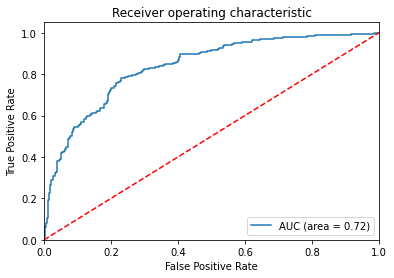

In [19]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model Tuning (Model Doğrulama)

test-train seklinde ayiralim

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [21]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [22]:
y_pred = loj_model.predict(X_test)

In [23]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


cross validation yapalim

In [24]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

# K-En Yakın Komşu (KNN)

gozlemlerin birbirine olan benzerliklerine gore siniflandirma yapar

In [25]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [26]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

modelin parametrelerine bakalim https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [27]:
knn_model.algorithm

'auto'

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

en iyi parametreleri bulmak icin bu yontemi kullanalim

In [31]:
knn = KNeighborsClassifier()

In [32]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [33]:
knn_params = {"n_neighbors": np.arange(1,50)}

GridSearchCV kullanacagiz

In [34]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [35]:
knn_cv_model.best_score_

0.748637316561845

In [36]:
knn_cv_model.best_params_

{'n_neighbors': 11}

en iyi parametreyi girelim ve tekrar egitelim

In [37]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [38]:
y_pred = knn_tuned.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.7316017316017316

bu sekilde de accuracy bulabiliriz

In [40]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

# Destek Vektör Makineleri (SVM)

amac iki sinif arasindaki ayrimin optimum olmasini saglayacak hiper-duzelmi bulmaktir.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

dogrusal bir model olarak bakalim 

In [42]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [43]:
svm_model

SVC(kernel='linear')

In [44]:
y_pred = svm_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

farkli parametreler ile tekrar bakalim

In [46]:
svm = SVC()

In [47]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}

In [48]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [49]:
svm_cv_model.best_score_

0.7839044652128765

In [50]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

en iyi parametrelere gore tekrar model olusturalim

In [51]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [52]:
y_pred = svm_tuned.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Yapay Sinir Ağları (Çok Katmanlı Algılayıcılar)

insan beynini referans alir daha ayrintili uygulamalar deeplearning repomda uygulamalar mevcut

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

StandartScaler ile degiskenleri standartlastiralim yapay sinir aglarinda gayet faydali bir yontemdir detayli hali deeplearning reposunda var

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [57]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Model & Tahmin

In [58]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


cok fazla katsayi cikacaktir

In [ ]:
mlpc_model.coefs_

In [60]:
y_pred = mlpc_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

alpha ve katman sayilarini farkli degerleri deneyelim

In [62]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

adam yerine lbfgs kullanacagiz aktivasyon ise logistic kullanalim 

In [63]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [64]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [65]:
mlpc_cv_model

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (100, 100), (3, 5)]},
             verbose=2)

In [66]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

en iyi degerlerle tekrar egitelim

In [67]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 1, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

In [68]:
y_pred = mlpc_tuned.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.7575757575757576

yalniz deger cok iyi

# CART (Classification and Regression Tree)

amac karmasik yapilari basit karar yapilarina donusturmektur, heterojen veri setleri bir hedef degiskene gore homojen alt gruplara ayrilir

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [71]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [77]:
#bunu gibi farkli parametrelere default olarak sahip bunlari degistirebiliriz
cart_model.criterion

'gini'

In [78]:
y_pred = cart_model.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.7229437229437229

### Model Tuning

In [80]:
cart = DecisionTreeClassifier()

In [81]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [82]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [83]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

en iyi performans veren parametreleri grielim

In [84]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(X_train, y_train)

In [85]:
y_pred = cart_tuned.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

* Birden cok tekil karar agaclarinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir. Bagging yontemi bunun temelini olsuturur. Arastirilsin.



In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [89]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
rf_model.criterion

'gini'

In [91]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

### Model Tuning

In [92]:
rf = RandomForestClassifier()

In [93]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [94]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [95]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}

en iyi parametreleri ekleyelim

In [96]:
rf_tuned = RandomForestClassifier(max_features = 8, 
                                  min_samples_split = 5, 
                                  n_estimators = 500).fit(X_train, y_train)

In [97]:
y_pred = rf_tuned.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.7445887445887446

degiskenlerin onem duzeylerine bakalim, bu degerlere gore bazi degiskenleri cikartabilir veya korelasyon icinde olan degiskenleri gorebiliriz.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rf_tuned

RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500)

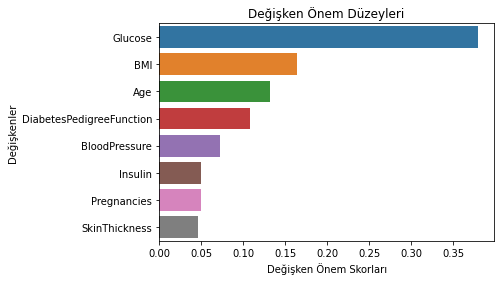

In [100]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Gradient Boosting Machines
AdaBoost un siniflandirma ve regresyon problemlerine uyarlanabilen versiyonudur.
Olusturulan agaclarin urettigi sonuclar uzerinden yeni agaclar olusturulur.

* Tek bir tahminsel model formunda olan modeller serisi olusturur.
* Seri icindeki bir model serideki bir onceki modelin hatalarinin uzerine kurularak olusturulur.
* Gradient Descent algoritmasi kullanilir.
*Boosting + Gradient Descent

### Model & Tahmin

In [101]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [102]:
y_pred = gbm_model.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

In [104]:
gbm = GradientBoostingClassifier()

In [105]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}

In [106]:
gbm_cv_model= GridSearchCV(gbm, gbm_params, 
                           cv = 10, 
                           n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [107]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

en iyi parametreler ile tekrar egitelim

In [108]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth = 5, 
                                       n_estimators = 500).fit(X_train, y_train)

In [109]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

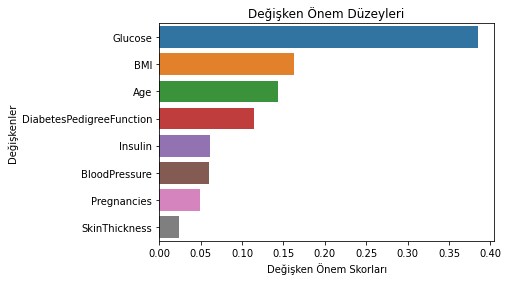

In [110]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# XGBoost
GBM in hiz ve tahmin performansini arttirmak uzere optimize edilmis, olceklenebilir ve farkli platformlara entegre edilebilir halidir.
* Hizlidir
* Tahmin basarisi yuksektir.
* Olceklenebilirdir.

### Model & Tahmin

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [114]:
y_pred = xgb_model.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred)

0.7489177489177489

### Model Tuning

In [116]:
xgb = XGBClassifier()

In [117]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [118]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [119]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

en iyi parametrelere gore tekrar egitelim

In [120]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.001, 
                                max_depth= 7, 
                                n_estimators= 500, 
                                subsample= 0.6).fit(X_train, y_train)

In [121]:
y_pred = xgb_tuned.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.7575757575757576

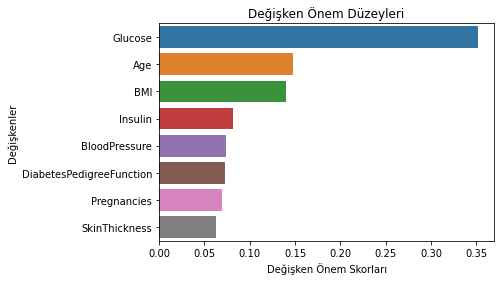

In [123]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Light GBM
XGBoost un egitm suresi ve performansini iyilestirmek icin gelistirilen GBM turu.
* Daha performansli
* Level-wise buyume stratejisi yerine Leaf-wise buyume stratejisini kullanir. 
* Breadth-fist search(BFS) yerine depth-firs search (DFS) kullanir.
* XGBoost yatay anlamda arama islemi yaparken BU dikey anlamda yani daha derine odaklanarak arama yapar.

### Model & Tahmin

In [124]:
from lightgbm import LGBMClassifier

In [125]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [127]:
y_pred = lgbm_model.predict(X_test)

In [128]:
accuracy_score(y_test,y_pred)

0.7272727272727273

### Model Tuning

In [129]:
lgbm = LGBMClassifier()

In [131]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [132]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [133]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01, 
                            max_depth= 1, 
                            n_estimators= 500).fit(X_train, y_train)

In [134]:
y_pred = lgbm_tuned.predict(X_test)

In [135]:
accuracy_score(y_test, y_pred)

0.7575757575757576

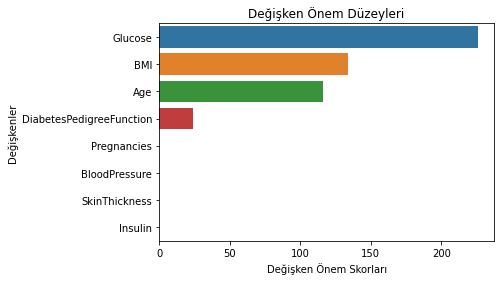

In [136]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# CatBoost

Kategorik degiskenler ile otomatik olarak mucadele edebilen hizli basarili bir diger GBM turevidir.

### Model & Tahmin

In [138]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [151]:
from catboost import CatBoostClassifier

In [140]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [141]:
y_pred = catb_model.predict(X_test)

In [142]:
accuracy_score(y_test, y_pred)

0.7402597402597403

### Model Tuning

In [143]:
catb = CatBoostClassifier()

In [144]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}

In [ ]:
catb_cv_model = GridSearchCV(catb, catb_params, 
                             cv = 5, n_jobs = -1, verbose = 0).fit(X_train, y_train)

In [146]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

eniyi parametrelerle tekrar egitelim

In [ ]:
catb_tuned = CatBoostClassifier(depth= 8, 
                                iterations= 200, 
                                learning_rate= 0.03).fit(X_train, y_train)

In [148]:
y_pred = catb_tuned.predict(X_test)

In [149]:
accuracy_score(y_test, y_pred)

0.7489177489177489

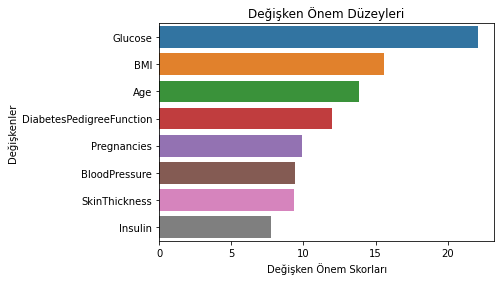

In [150]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Tüm Modellerin Karşılaştırılması

In [153]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


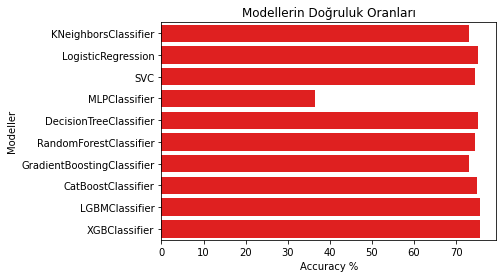

In [154]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.757576
0,SVC,74.458874
0,MLPClassifier,67.965368
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,73.593074
0,CatBoostClassifier,75.324675
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576


## Ek olarak
* Degisken turetme yapilabilir.
* Basit iyidir diyerek degiskenlerin arasinda secim yapabiliriz.
* Auto ML yapilabilir.
* Model deployment ogrenilebilir.